In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
pd.set_option('display.max_columns', 500)

#ML Models
""" import xgboost as xgb
"""
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

energydf=pd.read_csv('../energy_dataset.csv', parse_dates=True, index_col=0)
wdf = pd.read_csv('../weather_features.csv', parse_dates=True)

data = pd.merge(energydf, wdf, left_on='time', right_on='dt_iso')


energydf.index = pd.to_datetime(energydf.index, infer_datetime_format=True, utc=True)

In [12]:
def separate_date(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day of week'] = df.index.dayofweek
    df['hour'] = df.index.hour
    df['day of year'] = df.index.dayofyear
    df['quarter'] = df.index.quarter
    return df

energydf = separate_date(energydf)

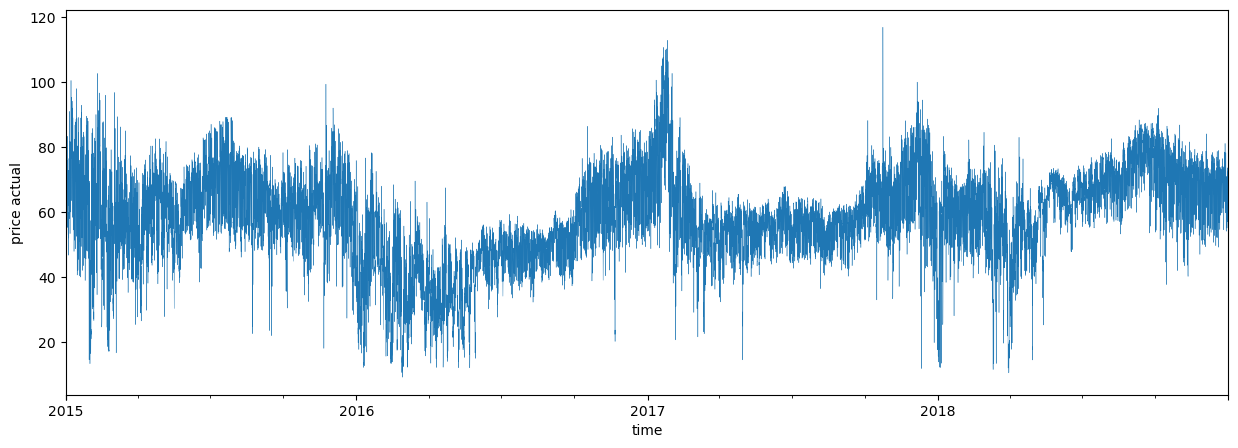

In [13]:
#Visualise actual price variation over time
plt.figure(figsize=(15,5))
energydf['price actual'].plot(kind='line', lw=0.3)
plt.ylabel('price actual')
plt.show()

In [14]:
#Create new columns for total power generation and total forecasted generation
generation = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore']


energydf['generation'] = energydf[generation].sum(axis=1)

energydf = energydf.drop(generation, axis=1).copy()


In [15]:
energydf['total load actual'] = energydf['total load actual'].fillna(method='bfill')


In [16]:
energydf.isna().sum()

forecast solar day ahead                 0
forecast wind offshore eday ahead    35064
forecast wind onshore day ahead          0
total load forecast                      0
total load actual                        0
price day ahead                          0
price actual                             0
year                                     0
month                                    0
day of week                              0
hour                                     0
day of year                              0
quarter                                  0
generation                               0
dtype: int64

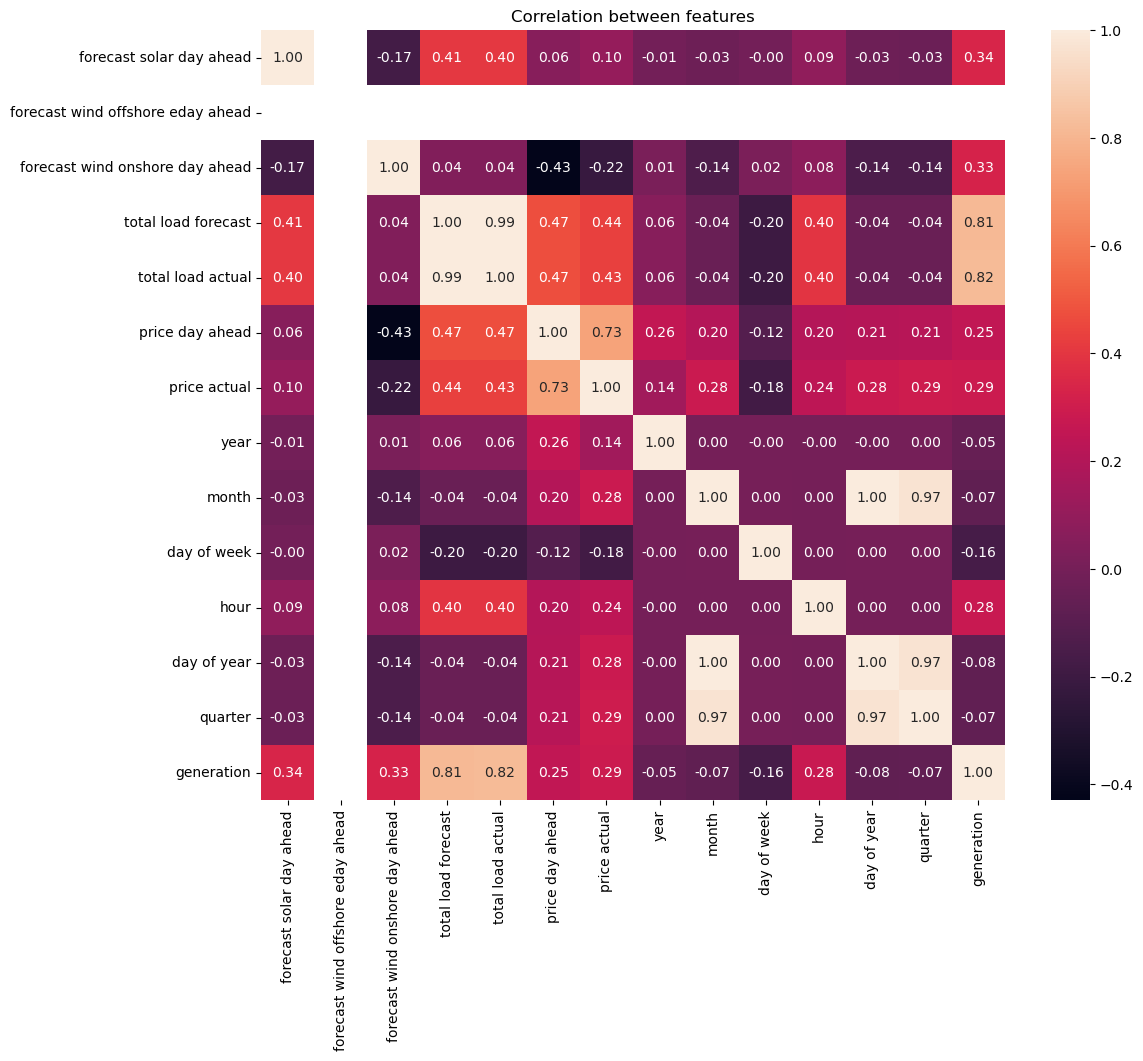

In [17]:
plt.figure(figsize=(12,10))
hm = sns.heatmap(energydf.corr(), annot=True, fmt="0.2f")
hm.set_title('Correlation between features')
plt.show()

In [20]:
plotCorrelationMatrix(data, 8)

NameError: name 'plotCorrelationMatrix' is not defined